# Data distribution and statistics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/customer_supermarket.csv", sep="\t",index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         471910 non-null  object 
 1   BasketDate       471910 non-null  object 
 2   Sale             471910 non-null  object 
 3   CustomerID       406830 non-null  float64
 4   CustomerCountry  471910 non-null  object 
 5   ProdID           471910 non-null  object 
 6   ProdDescr        471157 non-null  object 
 7   Qta              471910 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 32.4+ MB


## BasketID
Il basketID è un nominale vediamo da che caratteri è composto (numeri lettere ecc)

In [2]:
print("MAIUSC: "+str(df.BasketID.str.contains('[A-Z]').any()))
print("minuscole: "+str(df.BasketID.str.contains('[a-z]').any()))
print("Numeri: "+str(df.BasketID.str.contains('[0-9]').any()))
print("Segni speciali: "+str(df.BasketID.str.contains('[^A-Za-z0-9]').any()))

MAIUSC: True
minuscole: False
Numeri: True
Segni speciali: False


## BasketDate
Per questo attributo verifichiamo a che intervallo di date include. Per fare ciò cambiamo il tipo della colonna

In [36]:
df_for_dates=df.copy()
df_for_dates["BasketDate"] = pd.to_datetime(df_for_dates['BasketDate'], format='%d/%m/%y %H:%M')
df_for_dates.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


Vediamo che anni sono inclusi

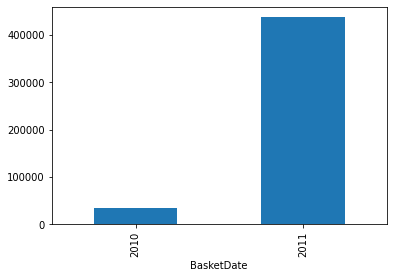

In [5]:
df_for_dates["BasketDate"].groupby(df_for_dates["BasketDate"].dt.year).count().plot(kind="bar")

Verifichiamo la distribuzione dei dati per gli acquisti del 2011

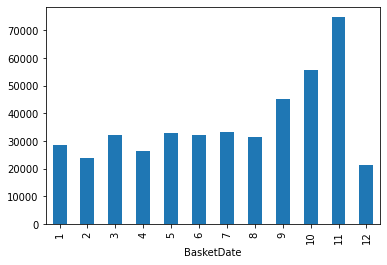

In [6]:
df_for_dates[df_for_dates['BasketDate'] > '2011-01-01']["BasketDate"].groupby(df_for_dates["BasketDate"].dt.month).count().plot(kind="bar")

Verifichiamo la distribuzione dei dati per gli acquisti del 2010

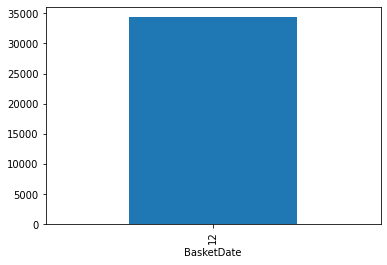

In [7]:

mask=(df_for_dates['BasketDate'] > '2010-01-01' ) & (df_for_dates['BasketDate'] < '2011-01-01')
df_for_dates[mask]["BasketDate"].groupby(df_for_dates["BasketDate"].dt.month).count().plot(kind="bar")

In [8]:
print("Distinct Values in CustomerCountry:\t", df.CustomerCountry.unique(), "Len: \n", len(df.CustomerCountry.unique()))
print("Distinct Values in ProdID:\t", df.ProdID.unique(), "Len: \n", len(df.ProdID.unique()))

Distinct Values in CustomerCountry:	 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA'] Len: 
 38
Distinct Values in ProdID:	 ['85123A' '71053' '84406B' ... '90214U' '23645' '23843'] Len: 
 3953


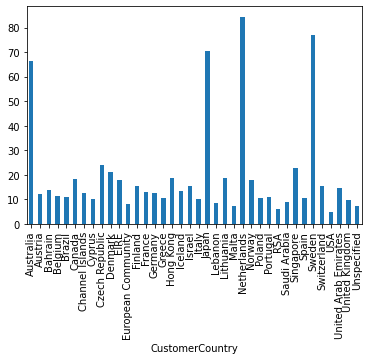

In [9]:
(df.groupby(['CustomerCountry']).mean())["Qta"].plot(kind="bar")


In [34]:
print("Different Customers:",len(df.CustomerID.unique()))
print("Number of customers consider per avg:",len(df.groupby(['CustomerID'])))
(df.groupby(['CustomerID']).mean())

Different Customers: 4373
Number of customers consider per avg: 4372


,Qta
CustomerID,
12346.0,0.000000
12347.0,13.505495
12348.0,75.516129
12349.0,8.643836
12350.0,11.588235
...,...
18280.0,4.500000
18281.0,7.714286
18282.0,7.538462
